In [464]:
from random import randint
def kuroAdd(results, skill, gimmiku, tn):
    count = skill;
    for i in range(len(results)):
        if(results[i] != 4):
            count += results[i]
        if('expertise' in gimmiku):
            if(results[i] == 4 and i+1 <= gimmiku['expertise']):
                count += results[i]
    if('focus' in gimmiku):
        count+= gimmiku['focus']*2
    if('accuracy' in gimmiku and count >= tn):
        count += gimmiku['accuracy']*4
    return count

In [179]:
def expertise(results, gimmiku):
    results.sort()
    for i in range(gimmiku['expertise']):
        if(i<len(results)):
            if(results[i] != 6):
                result = randint(1,6)
                results[i] = result;
                while(result == 6):
                    result = randint(1,6)
                    results.append(result)


In [238]:
          
def kuroRoll(characteristic, gimmiku):
    results = []
    startingMastery = 0
    if('mastery' in gimmiku):
        startingMastery = gimmiku['mastery']
    if('boost' in gimmiku):
        dicePool = characteristic + gimmiku['boost']
    else:
        dicePool = characteristic
    for i in range(dicePool):
        result = randint(1,6)
        results.append(result)
        if('mastery' in gimmiku and gimmiku['mastery'] > 0 and result == 5):     
            result = randint(1,6)
            results.append(result)
            gimmiku['mastery']-= 1
        while(result == 6):
            result = randint(1,6)
            results.append(result)
    if('expertise' in gimmiku):
        expertise(results, gimmiku)
    if('mastery' in gimmiku):
        gimmiku['mastery'] = startingMastery
        
    return results

In [174]:

results = kuroRoll(3,{'expertise': 1})

6


In [332]:
print(results)
gimmiku = {'focus':1}
print(kuroAdd(results, 0, gimmiku))

[6, 2, 3, 6, 6, 4]
25


In [490]:
import pandas as pd
tn = 12
def simulateRolls(characteristic, skill, gimmiku, sampleSize):
    scores = []
    for i in range(sampleSize):
        dieRolls = kuroRoll(characteristic, gimmiku)
        scores.append(kuroAdd(dieRolls, skill, gimmiku, tn))
    return scores

In [471]:
import matplotlib.pyplot as plt


In [472]:
import numpy as np



In [494]:
gimmikuNames = ['boost', 'mastery', 'focus', 'expertise', 'accuracy', 'No Gimmiku']
gimmikuResults = {}
for gimmikuName in gimmikuNames:
    gimmikuResults[gimmikuName] = simulateRolls(characteristic, 11, {gimmikuName : 2}, 100000)

In [495]:
import statistics

In [496]:
print("gimmiku    average    max  min median mode")
for gimmiku, gimmikuResult in gimmikuResults.items():
    stats = {'gimmiku' : gimmiku, 'mean': statistics.mean(gimmikuResult), 'max' : max(gimmikuResult), 'min': min(gimmikuResult), 'median':statistics.median(gimmikuResult), 'mode': statistics.mode(gimmikuResult)}
    print("%(gimmiku)10s %(mean)f %(max)3d %(min)3d %(median)6d  %(mode)4d" % stats)

gimmiku    average    max  min median mode
     boost 28.011610  81  11     27    25
   mastery 22.892180  72  11     22    22
     focus 25.213320  79  15     24    23
 expertise 25.744850  77  13     25    22
  accuracy 29.191030  71  11     28    27
No Gimmiku 21.161850  73  11     20    19


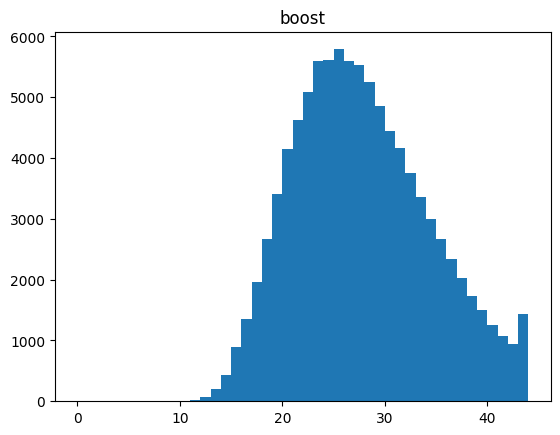

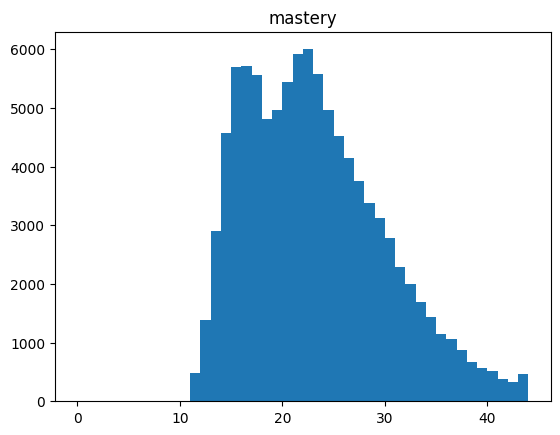

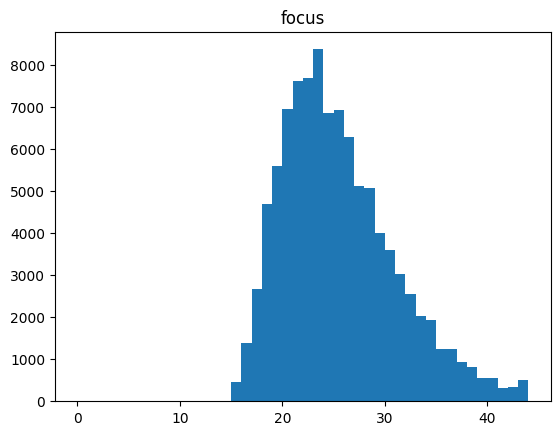

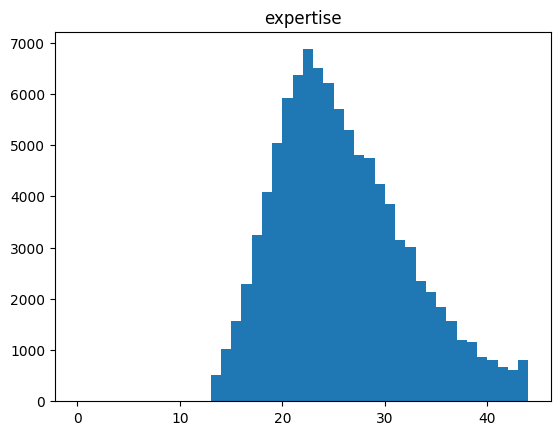

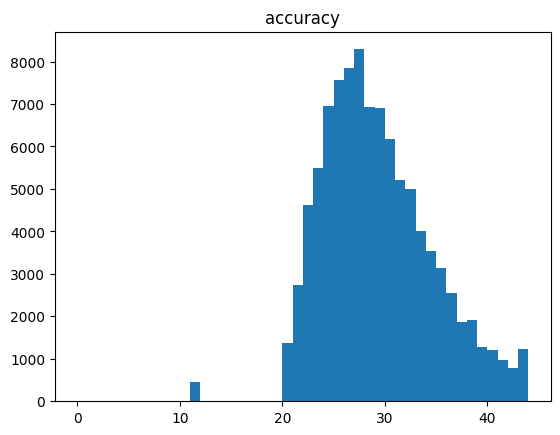

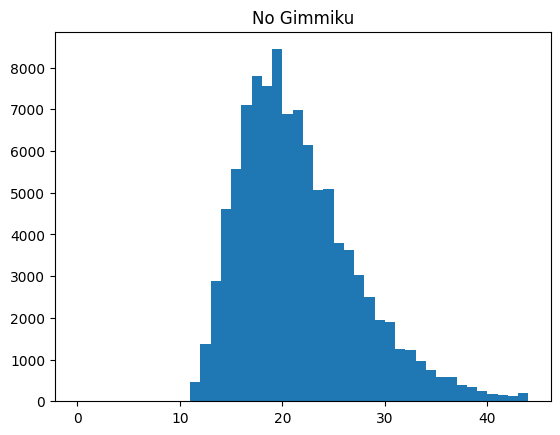

In [497]:

for gimmiku, gimmikuResult in gimmikuResults.items():
    plt.hist(gimmikuResult, bins=np.arange(min(masteryRolls), max(masteryRolls)+1))
    plt.title(gimmiku)
    plt.show()

In [ ]:
characteristic = 2

In [498]:

gimmikuResultsCharOfTwo = {}
for gimmikuName in gimmikuNames:
    gimmikuResultsCharOfTwo[gimmikuName] = simulateRolls(1, 5, {gimmikuName : 1}, 100000)

In [504]:
print("gimmiku      average   max  min median mode")
for gimmiku, gimmikuResult in gimmikuResultsCharOfTwo.items():
    stats = {'gimmiku' : gimmiku, 'mean': statistics.mean(gimmikuResult), 'max' : max(gimmikuResult), 'min': min(gimmikuResult), 'median':statistics.median(gimmikuResult), 'mode': statistics.mode(gimmikuResult)}
    print("%(gimmiku)10s %(mean)10f %(max)3d %(min)3d %(median)6d  %(mode)4d" % stats)

gimmiku      average   max  min median mode
     boost  11.797050  49   5     11     8
   mastery   8.963310  44   5      7     5
     focus  10.408680  46   7     10    12
 expertise  10.260700  50   6      9    10
  accuracy   8.952950  59   5      7     7
No Gimmiku   8.399500  46   5      8     5


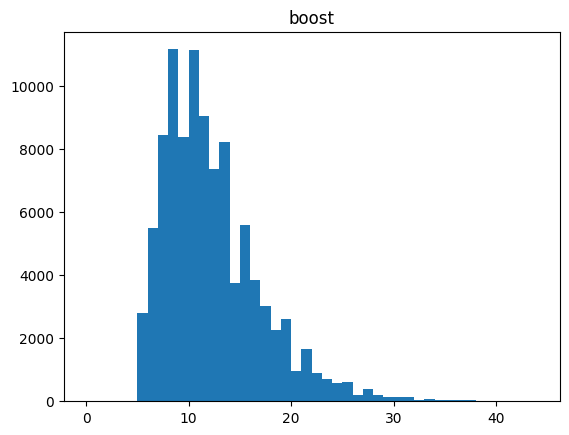

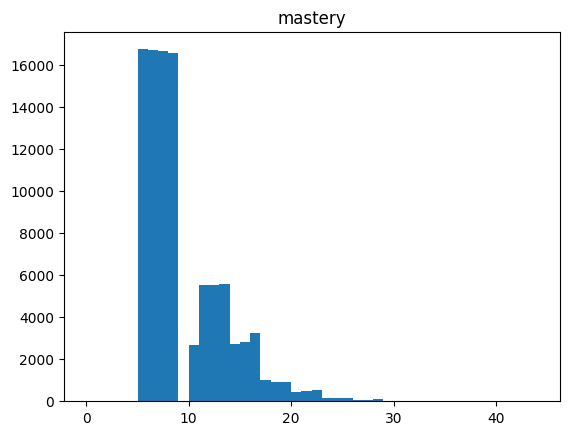

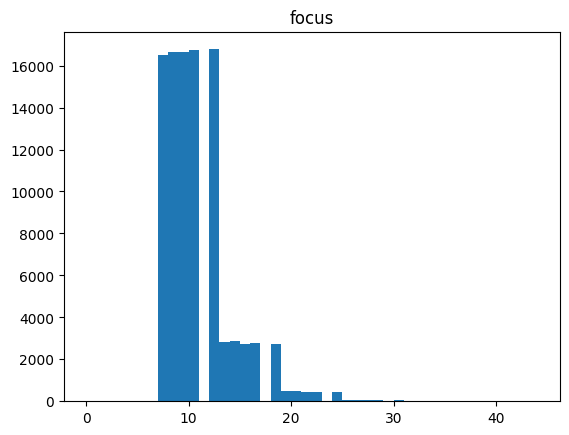

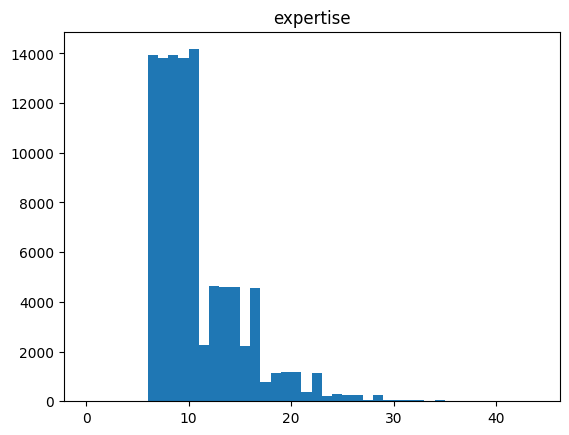

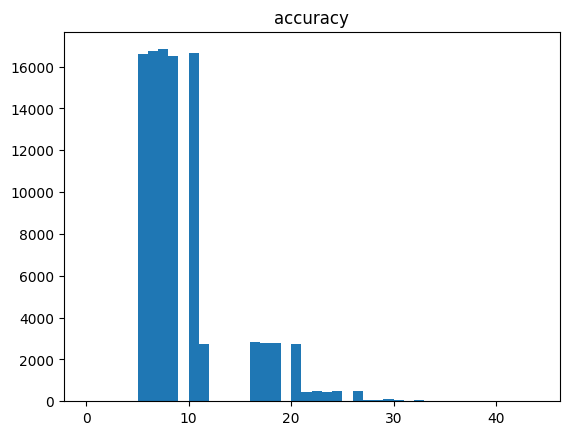

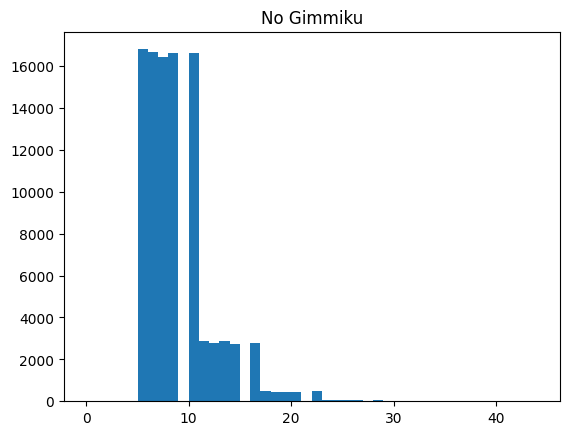

In [500]:

for gimmiku, gimmikuResult in gimmikuResultsCharOfTwo.items():
    plt.hist(gimmikuResult, bins=np.arange(min(masteryRolls), max(masteryRolls)+1))
    plt.title(gimmiku)
    plt.show()